In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv("../data/labelled_buckets_dataset.csv")
all_categories = list(df.groupby('b2').groups.keys())
tags = [0 for i in range(len(all_categories))]
buckets_map = dict(zip(all_categories, tags))

print("b2_categories: ",all_categories)
print("buckets_map: ", buckets_map)

b2_categories:  ['Accessories', 'ActiveWear', 'Beachwear', 'Bohemian', 'BusinessCasual', 'Casual', 'StreetWear', 'Swimwear', 'Trendy', 'Vintage']
buckets_map:  {'Accessories': 0, 'ActiveWear': 0, 'Beachwear': 0, 'Bohemian': 0, 'BusinessCasual': 0, 'Casual': 0, 'StreetWear': 0, 'Swimwear': 0, 'Trendy': 0, 'Vintage': 0}


# 1. reshape dataset from 5735 dataset
# id product_title product_description, [10 categories]



In [95]:
for category in all_categories:
    df.insert(len(df.columns), category, 0)

In [96]:

for row in range(df.shape[0]):
    b1 = df.loc[row, 'b1']
    b2 = df.loc[row, 'b2']
    b3 = df.loc[row, 'b3']
    
    if isinstance(b1, str):
        if b1 != 'undefined' :
            if b1 != 'Casual':
                df.loc[row, b1] = 1
    if isinstance(b2, str):
        if b2 != 'undefined':
            df.loc[row, b2] = 1
    if isinstance(b3, str):
        if b3 != 'undefined':
            df.loc[row, b3] = 1

In [97]:
df.to_csv("./buckets_dataset_5k.csv", index=False)

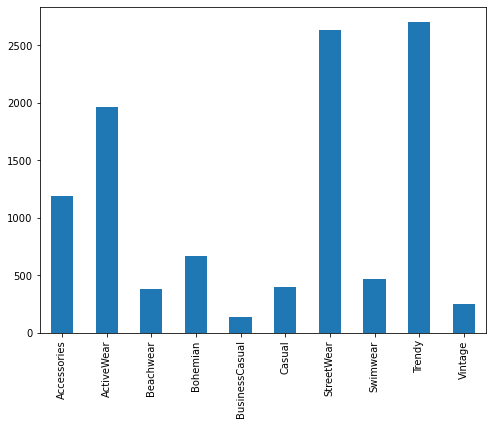

In [98]:
fig = plt.figure(figsize=(8,6))
df[all_categories].sum().plot.bar()
plt.show()